In [1]:
import numpy as np
import csv
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('grouped_simplified.csv',usecols=['crypto','open','close','volume'],on_bad_lines='skip')
data['change'] = data.groupby('crypto')['close'].shift(-1)
data.tail()

,crypto,open,close,volume,change
386719376,SRM,0.764,0.764,0.0,0.764
386719377,SRM,0.764,0.764,0.0,0.764
386719378,SRM,0.764,0.764,0.0,0.764
386719379,SRM,0.764,0.764,0.0,0.764
386719380,SRM,0.764,0.764,0.0,NaN


In [2]:
data = data.dropna()
data.tail()

,crypto,open,close,volume,change
386719375,SRM,0.764,0.764,0.0,0.764
386719376,SRM,0.764,0.764,0.0,0.764
386719377,SRM,0.764,0.764,0.0,0.764
386719378,SRM,0.764,0.764,0.0,0.764
386719379,SRM,0.764,0.764,0.0,0.764


In [3]:
data['change'] = data['change']-data['open']
data.head()

,crypto,open,close,volume,change
0,DATA,0.04088,0.04741,21344.9,0.00451
1,DATA,0.04741,0.04539,18031.6,0.00413
2,DATA,0.04541,0.05154,360683.7,0.00110
3,DATA,0.04698,0.04651,209030.1,-0.00088
4,DATA,0.04671,0.04610,95900.6,0.00029


In [ ]:
# reader = pd.read_csv('grouped_simplified.csv',iterator=True,usecols=['crypto','open','close'])
# try:
#     df = reader.get_chunk(100000000)
# except StopIteration:
#     print("Iteration is stopped")
    
# df.tail()

In [ ]:
# loop = True
# chunkSize = 100000
# chunks = []
# while loop:
#     try:
#         chunk = reader.get_chunk(chunkSize)
#         chunks.append(chunk)
#     except StopIteration:
#         loop = False
#         print("Iteration is stopped")
# df = pd.concat(chunks,ignore_index=True)

In [4]:
std = data.groupby('crypto')["change"].std().rename("std").reset_index()

Allvolume = data.groupby('crypto')["volume"].mean().rename("Allvolume").reset_index()

std.head()


#data['std'] = data.groupby('crypto')['change'].transform(lambda x:x.std())
#data.head()

,crypto,std
0,1INCH,0.011225
1,1INCHDOWN,0.039075
2,1INCHUP,0.025746
3,AAVE,0.838124
4,AAVEDOWN,0.009507


In [5]:
df=std.merge(Allvolume)
df

,crypto,std,Allvolume
0,1INCH,0.011225,8074.009623
1,1INCHDOWN,0.039075,39516.523751
2,1INCHUP,0.025746,25671.974284
3,AAVE,0.838124,162.031497
4,AAVEDOWN,0.009507,915219.150603
...,...,...,...
404,YGG,0.016060,2705.523920
405,ZEC,0.323981,144.881332
406,ZEN,0.205348,143.155430
407,ZIL,0.000242,230090.001065


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = df[['std','Allvolume']]

kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))

print('------------')
print('prediction on each data: {}'.format(y_kmeans))


centroids: [[8.19660004e-01 1.09631334e+07]
 [1.06142617e-07 1.17192213e+10]]
------------
prediction on each data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


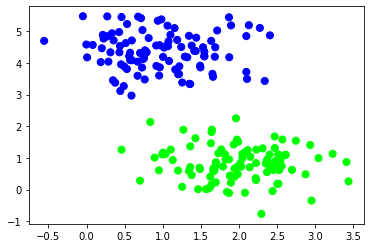

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs


X = make_blobs(n_samples=203,centers=2,
                cluster_std=0.60, random_state=0)

#y = np.array(X[0],dtype=float)
#print(X[1])

#print(X[1])


plt.scatter(X[0][:,0], X[0][:,1], c=X[1], s=50, cmap='brg')

In [ ]:
#data['sum'] = data.groupby('crypto')['volume'].transform('sum')

In [ ]:
#data.tail()